In [23]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
N = 100
x = np.linspace(-10, 10, N)

mu, sigma = 0, 2
rv = norm(mu, sigma)
p = rv.pdf

In [3]:
def h(x):
    return x

In [4]:
hx_bar = (h(x) * p(x)).mean()
hx_bar

-7.602374811491522e-19

In [5]:
def phi(x):
    return sigma**2 * h(x)

Text(0, 0.5, '$\\phi(x)$')

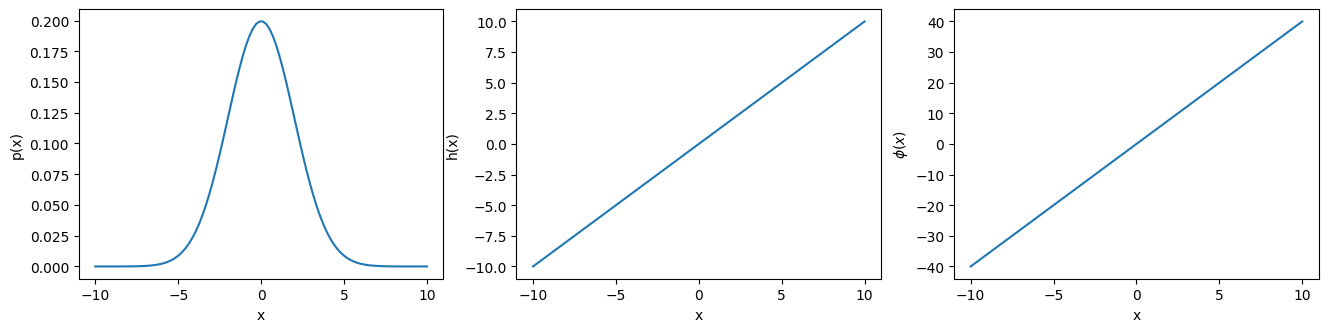

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3.5))
ax[0].plot(x, p(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')

ax[1].plot(x, h(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('h(x)')


ax[2].plot(x, phi(x))
ax[2].set_xlabel('x')
ax[2].set_ylabel('$\phi(x)$')

In [26]:
def dm(X, h, ϕ_prev, ϵ=0.1, L=1000):
    
    X_1, X_2 = np.meshgrid(X, X, indexing='ij')
    g = np.exp(-np.square(X_1 - X_2)/(4*ϵ))

    g_rowsum = np.sum(g, axis=1)
    g_1, g_2 = np.meshgrid(g_rowsum, g_rowsum, indexing='ij')
    k = g/(np.sqrt(g_1)*np.sqrt(g_2))

    d = np.sum(k, axis=1)
    T = k/d[:, None]
    π = d/d.sum()

    hx_hat = np.sum(π*h(X))

    ϕ = ϕ_prev

    for t in tqdm(range(1, L+1)):
        ϕ = (T * ϕ).sum(axis=1) + ϵ*(h(X) - hx_hat)
    
    return ϕ

In [27]:
ϕ_pred = dm(X, h, np.random.randn(len(X)), L=10000)

100%|██████████| 10000/10000 [31:31<00:00,  5.29it/s]


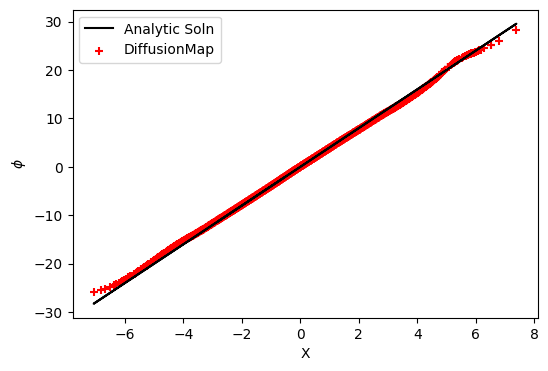

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(X, phi(X), color='black', linewidth=1.5, label='Analytic Soln')
ax.scatter(X, ϕ_pred, color='red', marker='+', label='DiffusionMap')
ax.set_xlabel('X')
ax.set_ylabel('$\phi$')
ax.legend()

fig.savefig('filtering.png')